**Authors:** Jozef Hanč, Martina Hančová <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Numerical study - Numerical calculations of ratio of i.r.v.'s </font>

# <font color = brown>Summary of results

<font size=5> Computational tools: </font>  **<font size=5>Python (Pandas)</font>** 


---

In [56]:
N = 3 #test up to 10^N

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

from numpy import inf as INF
from time import time

import math, cmath
import numba
import scipy

# approximate formulas for precisions expressed in bits and decimal places
bits = lambda d:round((d+1)*ln(10)/ln(2)) 
dps = lambda b:round(b*ln(2)/ln(10) - 1)

# accuracy in Python
def abs_errs(df1, df2):
    N = len(df1)
    errors = [abs(df1[i]-df2[i]) for i in range(N)]
    return errors

# Loading results of numerical study

## Adding Python data

In [57]:
benchres = pd.read_excel('data/DE-Python-results.xlsx')
benchres

,err,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),CC-conv
0,1.000000e-03,"[0.03837089716689661, 0.9197963026418232, 3.86...","[0.0015066334999573883, 1.2623773496703528, 3....","[0.00022042699982800212, 6.580500430464073, 3....","[0.0006701798334446114, 3.4974876715346217, 2....","[0.0016349296667128024, 2.56270169739478, 2.46...","[0.00015827866727098202, 4.401133207456107, 0...."
1,1.000000e-04,"[0.04003139983324218, 0.46397075052654563, 2.1...","[0.0015392673335736617, 1.316790396123119, 2.1...","[0.00020385533304458176, 2.734662359226865, 2....","[0.0006711936666397378, 3.3701687977609227, 5....","[0.0016622223332524299, 1.7738553911468338, 9....","[0.00016601900036524359, 11.658932635062945, 0..."
2,1.000000e-05,"[0.04515476816673375, 0.4011324253730717, 0.0,...","[0.0017333858333101184, 0.9870474884582245, 5....","[0.00022665666678221895, 2.730086266665967, 5....","[0.0006817085000026661, 3.8713682881222087, 5....","[0.0016493376667494886, 2.3695145599290246, 1....","[0.00016340633369206142, 5.939692418831886, 0...."
3,1.000000e-06,"[0.05150375800022933, 0.5658551663326976, 1.04...","[0.0019551339998239805, 1.2610193432704342, 1....","[0.00026843033308978194, 3.828330137006922, 1....","[0.0006925335002112358, 5.754963078028867, 5.9...","[0.0016714196667210975, 1.749811843646757, 2.5...","[0.0001575186667226565, 9.102465884227062, 0.0..."
4,1.000000e-07,"[0.05531397783323579, 0.46883563475776135, 1.3...","[0.0020717225001135376, 0.843310664030068, 1.0...","[0.0002846086665522307, 3.370476146006061, 1.0...","[0.000693323666685804, 4.662940053336089, 5.83...","[0.001687601500064678, 2.6902710713341516, 6.5...","[0.00015990833334702376, 15.214126064749848, 0..."
5,1.000000e-08,"[0.05985577950016402, 0.7477559543188957, 0.0,...","[0.002316759833629476, 1.1323241708825282, 0.0...","[0.00032441333338889913, 3.878404249068294, 0....","[0.0006878905001212843, 5.247507692670869, 5.8...","[0.0016263288333235929, 1.9911484390062029, 1....","[0.00016124066712412362, 11.489360158843413, 0..."
6,1.000000e-09,"[0.0636691858334719, 0.37821094359921725, 0.0,...","[0.0024758704999112524, 1.2994960505956508, 0....","[0.00033415500016417357, 3.982699191561514, 0....","[0.000701123666804051, 4.883666678883052, 5.81...","[0.0016270581666807025, 1.201243491736833, 1.3...","[0.0001568923334707506, 11.753044767706976, 0...."
7,1.000000e-10,"[0.07085361600028894, 0.3334912718787689, 0.0,...","[0.0027506983333538907, 0.7504997771205492, 0....","[0.00036698483333263233, 3.9048750662881235, 0...","[0.0006877873332511323, 3.158709926428204, 5.8...","[0.001665338166882672, 2.0914484651590386, 0.0...","[0.00015473433304578066, 8.453504081799267, 0...."
8,1.000000e-11,"[0.07522461983336445, 0.3442738257960017, 0.0,...","[0.0029487864998615503, 1.3502462833987912, 0....","[0.0003947826663594848, 3.6755072522072014, 0....","[0.0006984076669808322, 4.928336681840319, 5.8...","[0.0016359738333752225, 1.3993835789442708, 0....","[0.0001585576665820554, 12.1295218649786, 0.0,..."
9,1.000000e-12,"[0.08270607183338143, 0.23971475571640974, 0.0...","[0.003221419499604963, 0.8129652021175301, 0.0...","[0.00043445283319063795, 4.08513541838729, 0.0...","[0.0007048003333329689, 4.8416744229025594, 5....","[0.001638693833471431, 1.3184774078400414, 0.0...","[0.00016259066653825964, 14.112274441215101, 0..."


## Adding SageMath fast data 

In [58]:
# Function to convert string representation of list to actual list of floats
import ast
def str_to_list_of_floats(s):
    return [float(x) for x in ast.literal_eval(s)]

In [59]:
dS = pd.read_csv('data/DE-conv-Sage-fast.csv')
dS.index = benchres.index

In [60]:
show_allrowscols(dS, fullcolwidth=True)

,err,Analytic Sage fast
3,1.000000e-03,"[0.0005315338000024591, 7.602254743963401e-06, 0.0, 2.777997016450983736e-16]"
4,1.000000e-04,"[0.0005181708999977369, 5.788486043768991e-06, 0.0, 2.777997016450983736e-16]"
5,1.000000e-05,"[0.0005200482666599176, 1.5644232128744348e-06, 0.0, 2.777997016450983736e-16]"
6,1.000000e-06,"[0.0005185214333275023, 6.959843956835482e-07, 0.0, 2.777997016450983736e-16]"
7,1.000000e-07,"[0.000523565400003766, 2.281490182466763e-06, 0.0, 2.777997016450983736e-16]"
8,1.000000e-08,"[0.000517911166670577, 3.4773962027424904e-06, 0.0, 2.777997016450983736e-16]"
9,1.000000e-09,"[0.0005156113999983063, 5.663138514618276e-06, 0.0, 2.777997016450983736e-16]"
10,1.000000e-10,"[0.0005146285333321429, 4.297248846448436e-06, 0.0, 2.777997016450983736e-16]"
11,1.000000e-11,"[0.0005147795000035937, 5.8709720656310175e-06, 0.0, 2.777997016450983736e-16]"
12,1.000000e-12,"[0.0005230072666696893, 3.996199175496285e-06, 0.0, 2.777997016450983736e-16]"


In [61]:
benchres['Analytic'] = dS['Analytic Sage fast'].apply(str_to_list_of_floats)
benchres

,err,DE-conv,DE-conv-n,DE-conv-p,DE-CC(2^7+1),DE-CC(2^8+1),CC-conv,Analytic
3,1e-03,"[0.03837089716689661, 0.9197963026418232, 3.86...","[0.0015066334999573883, 1.2623773496703528, 3....","[0.00022042699982800212, 6.580500430464073, 3....","[0.0006701798334446114, 3.4974876715346217, 2....","[0.0016349296667128024, 2.56270169739478, 2.46...","[0.00015827866727098202, 4.401133207456107, 0....","[0.0005315338000024591, 7.602254743963401e-06,..."
4,1e-04,"[0.04003139983324218, 0.46397075052654563, 2.1...","[0.0015392673335736617, 1.316790396123119, 2.1...","[0.00020385533304458176, 2.734662359226865, 2....","[0.0006711936666397378, 3.3701687977609227, 5....","[0.0016622223332524299, 1.7738553911468338, 9....","[0.00016601900036524359, 11.658932635062945, 0...","[0.0005181708999977369, 5.788486043768991e-06,..."
5,1e-05,"[0.04515476816673375, 0.4011324253730717, 0.0,...","[0.0017333858333101184, 0.9870474884582245, 5....","[0.00022665666678221895, 2.730086266665967, 5....","[0.0006817085000026661, 3.8713682881222087, 5....","[0.0016493376667494886, 2.3695145599290246, 1....","[0.00016340633369206142, 5.939692418831886, 0....","[0.0005200482666599176, 1.5644232128744348e-06..."
6,1e-06,"[0.05150375800022933, 0.5658551663326976, 1.04...","[0.0019551339998239805, 1.2610193432704342, 1....","[0.00026843033308978194, 3.828330137006922, 1....","[0.0006925335002112358, 5.754963078028867, 5.9...","[0.0016714196667210975, 1.749811843646757, 2.5...","[0.0001575186667226565, 9.102465884227062, 0.0...","[0.0005185214333275023, 6.959843956835482e-07,..."
7,1e-07,"[0.05531397783323579, 0.46883563475776135, 1.3...","[0.0020717225001135376, 0.843310664030068, 1.0...","[0.0002846086665522307, 3.370476146006061, 1.0...","[0.000693323666685804, 4.662940053336089, 5.83...","[0.001687601500064678, 2.6902710713341516, 6.5...","[0.00015990833334702376, 15.214126064749848, 0...","[0.000523565400003766, 2.281490182466763e-06, ..."
8,1e-08,"[0.05985577950016402, 0.7477559543188957, 0.0,...","[0.002316759833629476, 1.1323241708825282, 0.0...","[0.00032441333338889913, 3.878404249068294, 0....","[0.0006878905001212843, 5.247507692670869, 5.8...","[0.0016263288333235929, 1.9911484390062029, 1....","[0.00016124066712412362, 11.489360158843413, 0...","[0.000517911166670577, 3.4773962027424904e-06,..."
9,1e-09,"[0.0636691858334719, 0.37821094359921725, 0.0,...","[0.0024758704999112524, 1.2994960505956508, 0....","[0.00033415500016417357, 3.982699191561514, 0....","[0.000701123666804051, 4.883666678883052, 5.81...","[0.0016270581666807025, 1.201243491736833, 1.3...","[0.0001568923334707506, 11.753044767706976, 0....","[0.0005156113999983063, 5.663138514618276e-06,..."
10,1e-10,"[0.07085361600028894, 0.3334912718787689, 0.0,...","[0.0027506983333538907, 0.7504997771205492, 0....","[0.00036698483333263233, 3.9048750662881235, 0...","[0.0006877873332511323, 3.158709926428204, 5.8...","[0.001665338166882672, 2.0914484651590386, 0.0...","[0.00015473433304578066, 8.453504081799267, 0....","[0.0005146285333321429, 4.297248846448436e-06,..."
11,1e-11,"[0.07522461983336445, 0.3442738257960017, 0.0,...","[0.0029487864998615503, 1.3502462833987912, 0....","[0.0003947826663594848, 3.6755072522072014, 0....","[0.0006984076669808322, 4.928336681840319, 5.8...","[0.0016359738333752225, 1.3993835789442708, 0....","[0.0001585576665820554, 12.1295218649786, 0.0,...","[0.0005147795000035937, 5.8709720656310175e-06..."
12,1e-12,"[0.08270607183338143, 0.23971475571640974, 0.0...","[0.003221419499604963, 0.8129652021175301, 0.0...","[0.00043445283319063795, 4.08513541838729, 0.0...","[0.0007048003333329689, 4.8416744229025594, 5....","[0.001638693833471431, 1.3184774078400414, 0.0...","[0.00016259066653825964, 14.112274441215101, 0...","[0.0005230072666696893, 3.996199175496285e-06,..."


## Adding MATLAB data

In [77]:
# Numerical studies in MATLAB were successfully realized and their results will be added very early.

# Run Times

In [78]:
times = benchres.iloc[:,1:].map(lambda x: x[0]).div(10**N)
times

,DE-conv,DE-conv-n,CC-conv,Analytic
3,0.000039,0.000002,0.000004,5.315338e-07
4,0.000040,0.000002,0.000004,5.181709e-07
5,0.000046,0.000002,0.000004,5.200483e-07
6,0.000051,0.000002,0.000004,5.185214e-07
7,0.000055,0.000002,0.000005,5.235654e-07
8,0.000060,0.000003,0.000004,5.179112e-07
9,0.000064,0.000003,0.000004,5.156114e-07
10,0.000072,0.000003,0.000004,5.146285e-07
11,0.000077,0.000003,0.000004,5.147795e-07
12,0.000084,0.000004,0.000004,5.230073e-07


In [58]:
times.mul(1000)

,DE-conv,DE-conv-n,CC-conv,Analytic
3,0.039107,0.001712,0.004477,0.000532
4,0.040070,0.001771,0.004400,0.000518
5,0.045576,0.001938,0.004497,0.000520
6,0.051402,0.002196,0.004368,0.000519
7,0.054528,0.002335,0.004545,0.000524
8,0.060102,0.002588,0.004375,0.000518
9,0.064474,0.002963,0.004430,0.000516
10,0.071717,0.002977,0.004367,0.000515
11,0.076679,0.003231,0.004393,0.000515
12,0.084164,0.003561,0.004330,0.000523


In [80]:
delta = benchres.iloc[:,1:].map(lambda x: x[1]/x[0]).multiply(100)
delta

,DE-conv,DE-conv-n,CC-conv,Analytic
3,3.730292,2.748914,0.813421,1.430249
4,0.598141,0.716073,2.663137,1.117100
5,1.054552,2.936408,1.713889,0.300823
6,1.333074,1.320324,1.983145,0.134225
7,1.115621,2.732301,3.254461,0.435760
8,0.674052,3.780509,1.445977,0.671427
9,0.968179,20.254618,3.090580,1.098335
10,1.610545,0.992684,2.169371,0.835020
11,0.531295,6.125398,1.021692,1.140483
12,1.054086,1.584677,1.260914,0.764081


In [60]:
tmin = min(times.min())
tmin

5.138057333291119e-07

In [61]:
Times = times.div(tmin)
Times.round(1)

,DE-conv,DE-conv-n,CC-conv,Analytic
3,76.1,3.3,8.7,1.0
4,78.0,3.4,8.6,1.0
5,88.7,3.8,8.8,1.0
6,100.0,4.3,8.5,1.0
7,106.1,4.5,8.8,1.0
8,117.0,5.0,8.5,1.0
9,125.5,5.8,8.6,1.0
10,139.6,5.8,8.5,1.0
11,149.2,6.3,8.6,1.0
12,163.8,6.9,8.4,1.0


In [62]:
tmax = max(times.max())
tmax

0.00010614450833333345

In [63]:
times.T.apply(lambda x: scn(x,1))

,3,4,5,6,7,8,9,10,11,12,13,14,15
DE-conv,3.9e-05,4.0e-05,4.6e-05,5.1e-05,5.5e-05,6.0e-05,6.4e-05,7.2e-05,7.7e-05,8.4e-05,9.1e-05,9.8e-05,1.1e-04
DE-conv-n,1.7e-06,1.8e-06,1.9e-06,2.2e-06,2.3e-06,2.6e-06,3.e-06,3.e-06,3.2e-06,3.6e-06,3.9e-06,4.0e-06,4.3e-06
CC-conv,4.5e-06,4.4e-06,4.5e-06,4.4e-06,4.5e-06,4.4e-06,4.4e-06,4.4e-06,4.4e-06,4.3e-06,4.3e-06,4.4e-06,4.4e-06
Analytic,5.3e-07,5.2e-07,5.2e-07,5.2e-07,5.2e-07,5.2e-07,5.2e-07,5.1e-07,5.1e-07,5.2e-07,5.2e-07,5.2e-07,5.1e-07


In [64]:
Times = times.div(tmin)
Times.round(1).T

,3,4,5,6,7,8,9,10,11,12,13,14,15
DE-conv,76.1,78.0,88.7,100.0,106.1,117.0,125.5,139.6,149.2,163.8,177.7,191.4,206.6
DE-conv-n,3.3,3.4,3.8,4.3,4.5,5.0,5.8,5.8,6.3,6.9,7.6,7.8,8.4
CC-conv,8.7,8.6,8.8,8.5,8.8,8.5,8.6,8.5,8.6,8.4,8.4,8.5,8.5
Analytic,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Errors

In [79]:
errsprint = benchres.iloc[:,1:].map(lambda x: scn(x[2:], 0))

In [66]:
errsprint

,DE-conv,DE-conv-n,CC-conv,Analytic
3,"[4.e-16, 1.e-04]","[4.e-16, 1.e-04]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
4,"[2.e-15, 6.e-06]","[2.e-15, 6.e-06]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
5,"[0.e+00, 1.e-08]","[6.e-17, 1.e-08]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
6,"[1.e-17, 7.e-09]","[1.e-17, 7.e-09]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
7,"[1.e-17, 3.e-09]","[1.e-17, 3.e-09]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
8,"[0.e+00, 1.e-10]","[0.e+00, 1.e-10]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
9,"[0.e+00, 1.e-12]","[0.e+00, 1.e-12]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
10,"[0.e+00, 3.e-13]","[0.e+00, 3.e-13]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
11,"[0.e+00, 9.e-14]","[0.e+00, 9.e-14]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
12,"[0.e+00, 1.e-15]","[0.e+00, 1.e-15]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"


In [67]:
methods

{'DE-conv': <function __main__.fconde(z, eps_rel=1e-15)>,
 'DE-conv-n': <function __main__.fconden(z, eps_rel=1e-15)>,
 'CC-conv': <function __main__.fconcc(x, eps_rel=1e-15)>}

In [68]:
methods.keys()

dict_keys(['DE-conv', 'DE-conv-n', 'CC-conv'])

In [69]:
errsprint

,DE-conv,DE-conv-n,CC-conv,Analytic
3,"[4.e-16, 1.e-04]","[4.e-16, 1.e-04]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
4,"[2.e-15, 6.e-06]","[2.e-15, 6.e-06]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
5,"[0.e+00, 1.e-08]","[6.e-17, 1.e-08]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
6,"[1.e-17, 7.e-09]","[1.e-17, 7.e-09]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
7,"[1.e-17, 3.e-09]","[1.e-17, 3.e-09]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
8,"[0.e+00, 1.e-10]","[0.e+00, 1.e-10]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
9,"[0.e+00, 1.e-12]","[0.e+00, 1.e-12]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
10,"[0.e+00, 3.e-13]","[0.e+00, 3.e-13]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
11,"[0.e+00, 9.e-14]","[0.e+00, 9.e-14]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"
12,"[0.e+00, 1.e-15]","[0.e+00, 1.e-15]","[0.e+00, 2.e-16]","[0.e+00, 3.e-16]"


In [70]:
maxerrs = benchres.iloc[:,1:].map(lambda x:x[3])
maxerrs

C:\Users\pf-odf-HP-pc\AppData\Local\Temp\ipykernel_4412\1250188343.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  maxerrs = benchres.iloc[:,1:].applymap(lambda x:x[3])


,DE-conv,DE-conv-n,CC-conv,Analytic
3,9.676832e-05,9.676832e-05,2.220446e-16,2.777997e-16
4,6.388033e-06,6.388033e-06,2.220446e-16,2.777997e-16
5,1.443611e-08,1.443611e-08,2.220446e-16,2.777997e-16
6,7.171904e-09,7.171904e-09,2.220446e-16,2.777997e-16
7,2.838643e-09,2.838643e-09,2.220446e-16,2.777997e-16
8,1.279884e-10,1.279884e-10,2.220446e-16,2.777997e-16
9,1.134370e-12,1.134426e-12,2.220446e-16,2.777997e-16
10,2.856604e-13,2.857714e-13,2.220446e-16,2.777997e-16
11,8.548717e-14,8.554268e-14,2.220446e-16,2.777997e-16
12,1.165734e-15,1.165734e-15,2.220446e-16,2.777997e-16


# Plots

In [71]:
benchres.columns

Index(['err', 'DE-conv', 'DE-conv-n', 'CC-conv', 'Analytic'], dtype='object')

In [72]:
kwargs = [{'label':'DE conv. (Python)','marker':'o', }, 
          {'label':'DE conv. (Python, Numba)', 'marker':'o', 'markerfacecolor':'w'}, 
          {'label':'CC conv. (Python, PaCal)', 'marker':'s', 'markerfacecolor':'w'},
          {'label':'CC conv. (PaCal+init)', 'marker':'s'},
          {'label':'Analytic (SageMath, fast)', 'marker':'D', 'markerfacecolor':'w'}
          ]
methodlist = ['DE-conv', 'DE-conv-n', 'CC-conv', 'CC-conv-init', 'Analytic']

Label = {key:kwarg for key, kwarg in zip(methodlist, kwargs)}

In [73]:
K = list(Label.items())
K

[('DE-conv', {'label': 'DE conv. (Python)', 'marker': 'o'}),
 ('DE-conv-n',
  {'label': 'DE conv. (Python, Numba)',
   'marker': 'o',
   'markerfacecolor': 'w'}),
 ('CC-conv',
  {'label': 'CC conv. (Python, PaCal)',
   'marker': 's',
   'markerfacecolor': 'w'}),
 ('CC-conv-init', {'label': 'CC conv. (PaCal+init)', 'marker': 's'}),
 ('Analytic',
  {'label': 'Analytic (SageMath, fast)',
   'marker': 'D',
   'markerfacecolor': 'w'})]

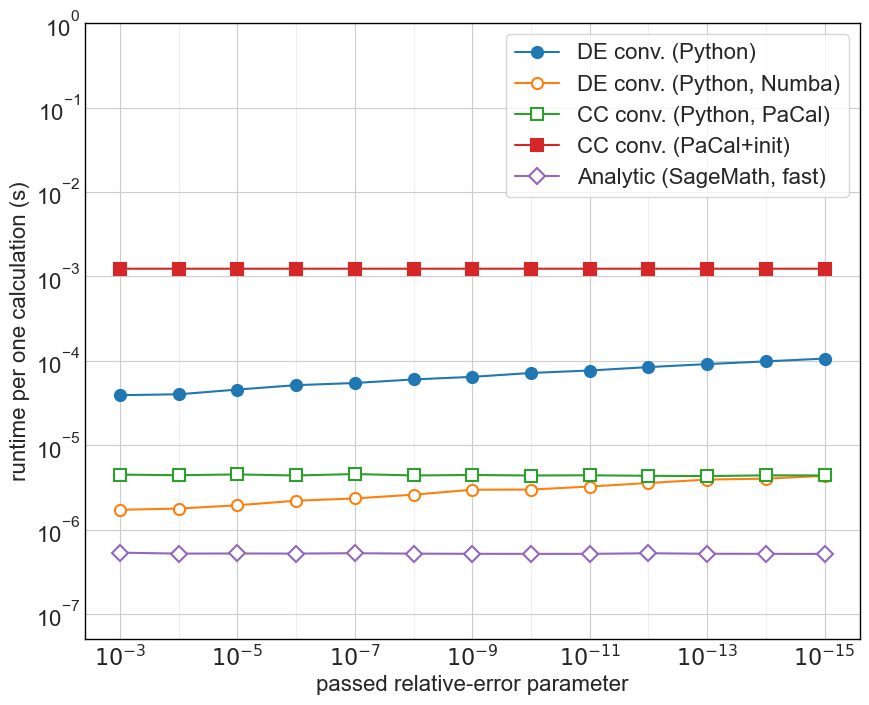

In [74]:
from matplotlib.ticker import MultipleLocator

plt.rcParams['font.size'] = '16'
plt.rcParams['lines.markersize'] = '8'

x = times.index

fig, ax = plt.subplots(figsize=(10,8))
for method, kwarg in Label.items():
    if 'init' in method: 
        method = method.replace('-init','')
        ax.plot(x,times[method]+dt, markeredgewidth=1.5, **kwarg)
    else:
        ax.plot(x,times[method], markeredgewidth=1.5, **kwarg)

ax.set_yscale('log')
ax.set_ylim(0.5e-7, 1e-0)

ax.set_xticks(range(3,16,2))
ax.set_xticklabels(['$10^{-'+str(n)+'}$' for n in range(3,16,2)])
#ax.set_yticklabels(['1e-'+str(n) for n in [6,5,4,]])
ax.set_xlabel('passed relative-error parameter')
ax.set_ylabel('runtime per one calculation (s)')


leg = ax.legend(frameon=True)

ax.minorticks_on()
minorXlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorXlocator)
ax.grid(which='minor', axis='x', linestyle='-', alpha=0.3)

plt.setp(ax.spines.values(), color='black');

plt.savefig('data/RunTimesPlot.png', dpi=300, bbox_inches='tight')

In [75]:
methodlist

['DE-conv', 'DE-conv-n', 'CC-conv', 'CC-conv-init', 'Analytic']

In [76]:
ekwargs = [{'label':'DE conv. (Python)','marker':'o', 'markersize':'11', 'linewidth':'3'}, 
          {'label':'DE conv. (Python, Numba)', 'marker':'o', 'markerfacecolor':'w'},
          {'label':'CC conv. (Python, PaCal)', 'marker':'s', 'markerfacecolor':'w'},
          {'label':'Analytic (SageMath, fast)', 'marker':'D', 'markerfacecolor':'w'}]
methodslist= ['DE-conv', 'DE-conv-n', 'CC-conv', 'Analytic']
eLabel = {key:kwarg for key, kwarg in zip(methodslist, ekwargs)}

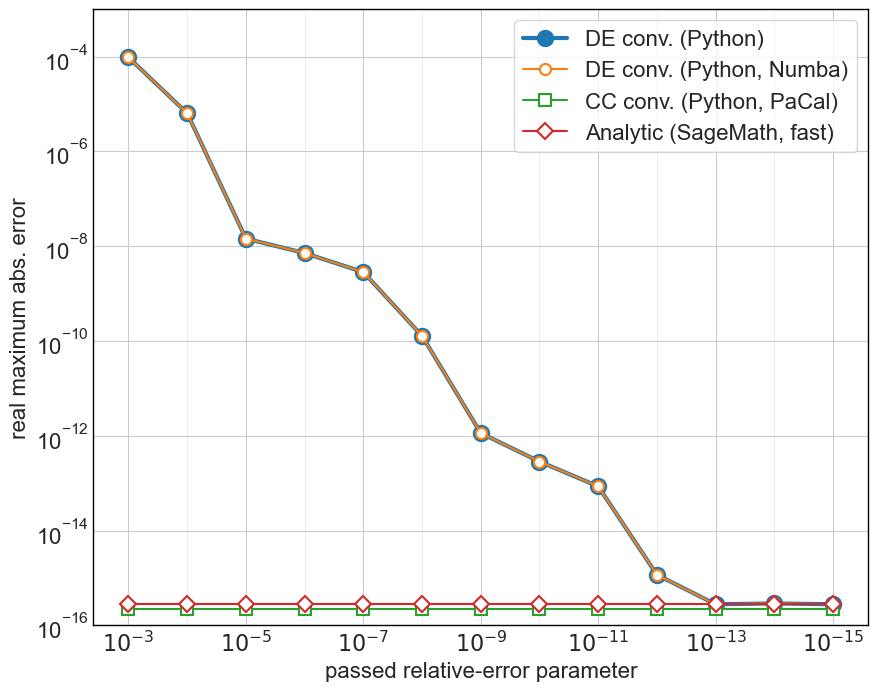

In [77]:
from matplotlib.ticker import MultipleLocator

plt.rcParams['font.size'] = '16'
plt.rcParams['lines.markersize'] = '8'

x = times.index

fig, ax = plt.subplots(figsize=(10,8))
for method, kwarg in eLabel.items():
    ax.plot(x,maxerrs[method], markeredgewidth=1.5, **kwarg)
ax.set_yscale('log')
ax.set_ylim(1e-16, 1e-3)

ax.set_xticks(range(3,16,2))
ax.set_xticklabels(['$10^{-'+str(n)+'}$' for n in range(3,16,2)])
#ax.set_yticklabels(['1e-'+str(n) for n in [6,5,4,]])
ax.set_xlabel('passed relative-error parameter')
ax.set_ylabel('real maximum abs. error')


leg = ax.legend(frameon=True)

ax.minorticks_on()
minorXlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorXlocator)
ax.grid(which='minor', axis='x', linestyle='-', alpha=0.3)

plt.setp(ax.spines.values(), color='black');

plt.savefig('data/ErrorPlot.png', dpi=300, bbox_inches='tight')

In [137]:
# plot_kwargs = {'figsize':(10,7), 'fontsize':14}
# fig = times.plot(logy=True, ylim = (1e-6, 1e-3),  **plot_kwargs);

In [138]:
# ***
# <a id=references></a>
# # <font color=brown> References </font>
# This notebook belongs to supplementary materials of the paper submitted to Journal of Statistical Computation and
# Simulation and available at  <https://arxiv.org/abs/2105.04427>.
# * Hančová, M., Gajdoš, A., Hanč, J. (2021). A practical, effective calculation of gamma difference distributions with open data science tools. arXiv:2105.04427 [cs, math, stat], https://arxiv.org/abs/2105.04427

# ### Abstract of the paper

# At present, there is still no officially accepted and extensively verified implementation of computing the gamma difference distribution allowing unequal shape parameters. We explore four computational ways of the gamma difference distribution with the different shape parameters resulting from time series kriging, a forecasting approach based on the best linear unbiased prediction, and linear mixed models. The results of our numerical study, with emphasis on using open data science tools, demonstrate that our open tool implemented in high-performance Python(with Numba) is exponentially fast, highly accurate, and very reliable. It combines numerical inversion of the characteristic function and the trapezoidal rule with the double exponential oscillatory transformation (DE quadrature). At the double 53-bit precision, our tool outperformed the speed of the analytical computation based on Tricomi's $U(a, b, z)$ function in CAS software (commercial Mathematica, open SageMath) by 1.5-2 orders. At the precision of scientific numerical computational tools, it exceeded open SciPy, NumPy, and commercial MATLAB 5-10 times. The potential future application of our tool for a mixture of characteristic functions could open new possibilities for fast data analysis based on exact probability distributions in areas like multidimensional statistics, measurement uncertainty analysis in metrology as well as in financial mathematics and risk analysis. 